<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Statistical NLP - Lab')

In [4]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Statistical NLP - Lab'

## 2. Setting Options

In [5]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [6]:
products = pd.read_csv('product_data.csv')

In [7]:
reviews = pd.read_csv('reviews.csv')

In [8]:
reviews.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
57700,B07NPRQYP1,seth,4,"May 21, 2019",False,Crazy Battery,Great battery life. Ive used the phone for 2 h...,2.0000000
22715,B01DZ2CS4U,Amazon Customer,2,"September 17, 2018",True,Faulty Phone,Bought this to replace a water-damaged phone. ...,nan
31548,B06XRG6S73,Jayla tims,3,"March 11, 2019",False,Not fully unlocked,Couldn't get metro service so not unclocked to...,1.0000000
37283,B072ZWCKP5,Teagercomehere,3,"April 4, 2018",True,Three Stars,Ok budget phone but has a crappy camera,1.0000000
20830,B01CJ3SCJ6,Ohio W,3,"November 24, 2017",True,NO SIM CARD!,Phone arrived without a Sim card so it can't b...,1.0000000


In [9]:
products.shape

(720, 10)

In [10]:
reviews.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [11]:
products = products.drop(columns = ['url', 'image', 'reviewUrl'], axis = 1)

In [12]:
products.shape

(720, 7)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [13]:
products.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,720,720,B07VYP6VLS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,716,10,Samsung,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,720,718,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,720.0000000,NaN,NaN,NaN,3.7137500,0.7160138,1.0000000,3.3000000,3.8000000,4.1000000,5.0000000
totalReviews,720.0000000,NaN,NaN,NaN,105.6791667,167.6011014,1.0000000,7.0000000,32.0000000,122.2500000,983.0000000
price,720.0000000,NaN,NaN,NaN,234.9489306,200.0084407,0.0000000,97.5125000,188.9750000,336.7250000,999.9900000
originalPrice,720.0000000,NaN,NaN,NaN,63.6907778,172.4053696,0.0000000,0.0000000,0.0000000,0.0000000,999.9900000


In [14]:
reviews.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,67986,720,B00F2SKPIM,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,67984,47323,Amazon Customer,6507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,67986.0000000,NaN,NaN,NaN,3.8079163,1.5829058,1.0000000,3.0000000,5.0000000,5.0000000,5.0000000
date,67986,2983,"December 11, 2019",234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verified,67986,2,True,61225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,67972,41489,Five Stars,6043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body,67965,59811,Good,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
helpfulVotes,27215.0000000,NaN,NaN,NaN,8.2296895,31.9548772,1.0000000,1.0000000,2.0000000,5.0000000,990.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

asin has a total of 720 unique products, same as other columns like - name has total 47323, the date has 2983, verified has 2, the title has 41489 and body has 55811. The top brand is Samsung. The top title is about Apple's iPhone 6s. The range of rating is from 1 to 5, and avg. rating is 3.71. The price range started from between 0 to 999.99.

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

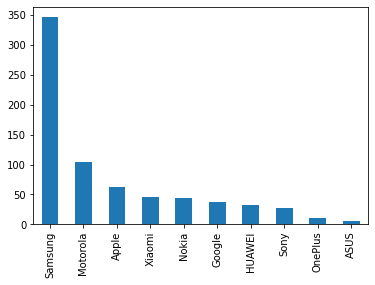

In [15]:
products['brand'].value_counts().plot(kind = 'bar')

The brand Samsung has the most products among the other brands. Asus has the least product.

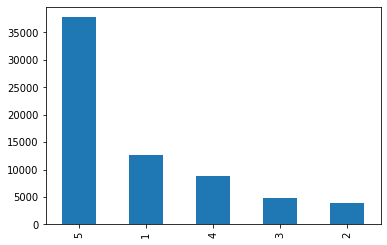

In [16]:
reviews['rating'].value_counts().plot(kind = 'bar')

The highest frequency for the ratings is 5, but same as lower rating 1 is on the highest, which is come after 5. So the most positive and the most negative reviews are the leading reviews.

### 4.5 Display average rating per brand

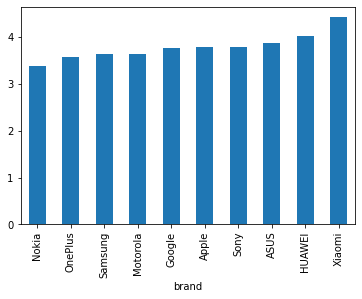

In [17]:
products.groupby('brand').mean()['rating'].sort_values().plot(kind = 'bar')

The brand Xiaomi has received the higher ratings, on the other hand, the brand Nokia has received the lower ratings. While Google and Apple have the avg. ratings.

### 4.6 Display average price per brand

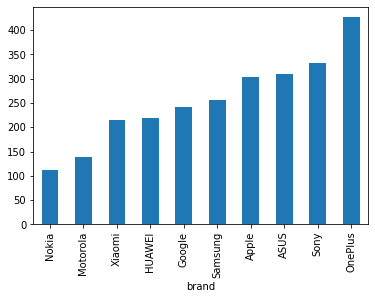

In [18]:
products.groupby('brand').mean()['price'].sort_values().plot(kind = 'bar')

In [19]:
products['price'].describe()

count   720.0000000
mean    234.9489306
std     200.0084407
min       0.0000000
25%      97.5125000
50%     188.9750000
75%     336.7250000
max     999.9900000
Name: price, dtype: float64

From the above analysis, the brand OnePlus has the highest price, in contrast, the brand Nokia has the lowest price. BUt here statistical report saying that the starting price is 0 so there is some misinformation in the dataset.

### 4.7 Display average 'totalReviews' per brand

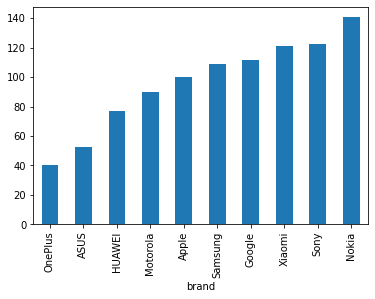

In [20]:
products.groupby('brand').mean()['totalReviews'].sort_values().plot(kind = 'bar')

Nokia has the highest reviews, in contrast, OnePlus has the lowest reviews. Here Samsung has the highest products, but it has an avg. reviews than any other brands.

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [21]:
df = pd.merge(reviews, products, on = 'asin', how = 'inner')

In [22]:
df.shape

(67986, 14)

In [23]:
df.sample(5)

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
21038,B01CJ3SCN2,debby-w,1,"November 17, 2018",True,Claimed to be a new phone and it was not.,The Samsung S7 I received was suppose to be ne...,1.0000000,Samsung,"Samsung Galaxy S7, Black 32GB (Verizon Wireless)",3.6000000,220,0.0000000,0.0000000
37688,B0731HBTZ7,ACL,1,"November 21, 2019",True,Useless,Not compatible with Verizon even though they c...,nan,Apple,"Apple iPhone 7 32GB, Rose Gold (Renewed)",3.8000000,452,199.9500000,210.0000000
65843,B07W14HFQP,Matthew,4,"March 18, 2019",True,Great,"Great product. I prefer 5.5"" screen and larger.",nan,Motorola,Motorola Moto G4 Play (4th Generation) 16GB 4G...,3.6000000,133,129.0000000,0.0000000
30371,B01NC2MEJP,Melinda Kirgan,3,"July 21, 2017",True,Battery life,Like the phone but is a refurbished phone am h...,3.0000000,Samsung,Samsung Galaxy Note 5 32GB GSM Unlocked - Blac...,3.2000000,301,163.9900000,0.0000000
60396,B07Q3T41M4,Microcell,5,"December 13, 2019",True,Best Product,Super phone,nan,Xiaomi,"Xiaomi Redmi Note 7 (64GB, 4GB) 6.3"" Display, ...",4.5000000,29,180.0000000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [24]:
df.rename(columns = { "rating_x": "user_rating", 
           "title_x": "review_title", 
           "title_y": "item_title", 
           "rating_y": "overall_rating"}, inplace = True)

In [25]:
df.columns

Index(['asin', 'name', 'user_rating', 'date', 'verified', 'review_title',
       'body', 'helpfulVotes', 'brand', 'item_title', 'overall_rating',
       'totalReviews', 'price', 'originalPrice'],
      dtype='object')

### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [26]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [27]:
df_v = df[df['verified'] == True]

In [28]:
df_v.shape

(61225, 14)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

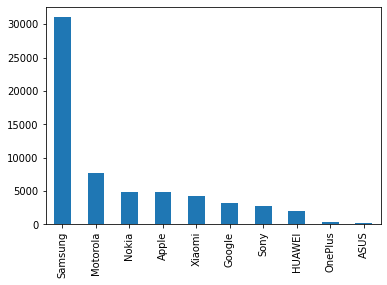

In [29]:
df_v['brand'].value_counts().plot(kind = 'bar')

Still, Samsung owned the highest reviews, while ASUS has the lowest reviews.

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [30]:
df_v = df_v[['brand', 'body', 'user_rating', 'review_title']]

In [31]:
df_v.columns

Index(['brand', 'body', 'user_rating', 'review_title'], dtype='object')

In [32]:
df_v.sample(5)

,brand,body,user_rating,review_title
64347,Samsung,"Awesome phone, loving the features especially ...",5,Awesome phone
14798,Motorola,Phone will not charge unless on a wireless cha...,1,Defective/ Broken
66657,Motorola,GREAT PRICE FOR AN UNLOCKED SMARTPHONE. WORKS ...,4,SHE LOVES IT
52698,Samsung,Esta muy bueno le funciona bien todo,5,Muy bueno
38168,Motorola,"My other phone is a ""cutting edge"" newer model...",5,great camera


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

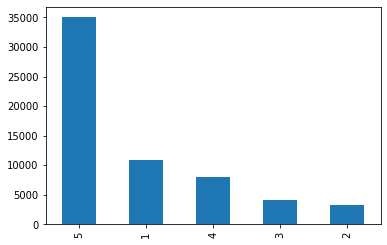

In [33]:
df_v['user_rating'].value_counts().plot(kind = 'bar')

The most positive ratings are 5, after that, the highest negative rating is 1.

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [34]:
df_v['sentiment'] = df_v['user_rating'].apply(lambda x : 1 if x > 3 else (0 if x == 3 else -1))

### 4.15 Check frequency distribution of the 'sentiment'

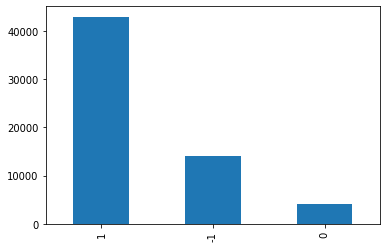

In [35]:
df_v['sentiment'].value_counts().plot(kind = 'bar')

As per the plot, the positive reviews are the highest, followed by negative comments, while neutral has the lowest reviews.

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

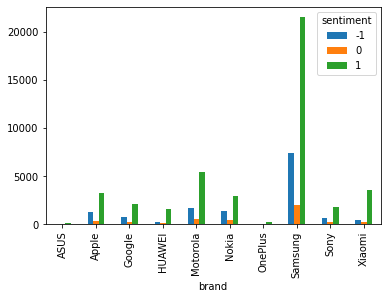

In [36]:
pd.crosstab(df_v['sentiment'], df_v['brand']).T.plot(kind = 'bar')

The brand Samsung still has the most sentiment ratings. In contrast, the brand ASUS and OnePlus seems the lowest sentiment ratings.

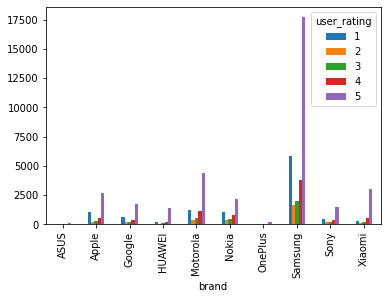

In [37]:
pd.crosstab(df_v['user_rating'], df_v['brand']).T.plot(kind = 'bar')

From the sentiment ratings, the user ratings have also the same reviews.

## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [38]:
df_v.sample(2)

,brand,body,user_rating,review_title,sentiment
28649,Samsung,Saved 200 and just as good as new,5,Five Stars,1
20628,Samsung,Love my phone..great price,5,Five Stars,1


In [39]:
df_v['body'] = df_v['body'].str.lower()

In [40]:
df_v['review_title'] = df_v['review_title'].str.lower()

In [41]:
df_v.sample(2)

,brand,body,user_rating,review_title,sentiment
60075,Xiaomi,excelente móvil 10 estrellas le doy,5,excelente movil,1
17754,Samsung,great product thanks,5,five stars,1


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [42]:
df_v['body'] = df_v['body'].str.replace('[^\w\s]','')

In [43]:
df_v['review_title'] = df_v['review_title'].str.replace('[^\w\s]','')

In [44]:
df_v.sample(20)

,brand,body,user_rating,review_title,sentiment
56535,Samsung,do not repeat do not get this phone if you are...,3,warning for att users,0
60520,Samsung,it was easy to set up and use,4,good phone for a good price,1
26092,Google,excelente,5,excelent,1
54589,HUAWEI,i have been using smartphones since bb days fr...,5,one of the best smartphone i have purchased,1
23795,Sony,i would like to give it 5 stars but i bought t...,3,i would like to give it 5 stars but i bought t...,0
38079,Sony,perfect,5,five stars,1
7306,Samsung,i loved my galaxy s3 but the s4 is even better...,5,samsung does it again,1
15866,Samsung,very good product,5,very good product,1
63078,Apple,el móvil esta completamente nuevo sin detalles...,5,vale la pena,1
12417,Motorola,the value that is found here is outstanding th...,5,absolute value,1


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [45]:
import nltk
from nltk.corpus import stopwords

In [46]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
df_v['body'] = df_v['body'].astype('str')

In [49]:
df_v['body'] = df_v['body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [50]:
df_v['body'].isnull().sum()

0

In [51]:
df_v.sample(5)

,brand,body,user_rating,review_title,sentiment
24514,Motorola,far like phone options old phone ok emergency ...,4,good phone for the price,1
27664,Samsung,worth price,5,i love it,1
6108,Nokia,going wait htc one come verizon seen phone 30 ...,5,love this phone,1
22264,Samsung,great phone year issues still happy tried ipho...,5,great phone have had it for a year now,1
67421,Xiaomi,funciona perfecto llego en su empaque nuevo si...,5,excelente,1


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [53]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
from nltk.stem.snowball import SnowballStemmer
lemmatizer = SnowballStemmer('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [54]:
def lemmatize_text(text):
    return [lemmatizer.stem(w) for w in w_tokenizer.tokenize(text)]

In [55]:
df_v['text_lemmatized'] = df_v['body'].apply(lemmatize_text)

In [56]:
df_v.sample(2)

,brand,body,user_rating,review_title,sentiment,text_lemmatized
42329,Apple,phone intermittent issues unable reach seller,3,seller is unable to be reached,0,"[phone, intermitt, issu, unabl, reach, seller]"
49645,Xiaomi,price,5,excelente,1,[price]


### 5.5 Write a function to check word frequency of the text

In [60]:
def count_words(data):
   words = data.split(" ")
   num_words = len(words)
   return num_words

In [61]:
df_v['body'].apply(count_words)

14          3
17          8
18         14
21         78
22         29
23          6
24          4
25         18
26         13
27          3
28         23
29          2
30         60
43        102
44         21
45          4
46         19
47         15
48         10
49         20
50         12
51         10
52         10
53         20
64         36
65         32
66          4
67          2
68         13
69          9
70         25
71         18
72         38
73         29
74          1
75         15
79         50
108        14
109         1
110        22
111        11
112         8
113        10
114        15
115         1
116        11
121        17
122        37
123        12
126        58
127        47
128        25
129        33
130        60
131        31
132        22
133        13
134         5
135       136
136        33
137        10
138         3
139         3
140        46
141         4
142        83
143         3
144        27
145       270
146        25
147         9
148   

In [57]:
import numpy as np

def word_count(text):
  wc = pd.DataFrame(columns=['word', 'count'])
  text_split = text.split()
  unique_word = np.unique(text_split)
  word_no = 1
  for i in unique_word:
    cnt = 0
    for j in text_split:
      if i == j:
        cnt = cnt + 1
    wc.loc[word_no, 'word'] = i
    wc.loc[word_no, 'count'] = cnt
    word_no = word_no + 1
  print(wc)

In [63]:
# taking the sample from the text for the less calculation
df_sample = df_v['body'].sample(1000)

In [64]:
df_sample.apply(word_count)

Streaming output truncated to the last 5000 lines.
2    china     1
3     fake     1
4   inside     1
5     made     1
6    nokia     2
7  nothing     1
8     real     1
9  working     1
       word count
1      back     1
2    giving     1
3       one     1
4     order     1
5   sending     1
6     speed     1
7      star     1
8        us     1
9      wont     1
10     work     1
       word count
1   battery     1
2       day     1
3      love     1
4       one     1
5     phone     1
6      save     1
7     short     1
8      shut     1
9     still     1
10     term     1
11   things     1
12     went     1
13     wish     1
            word count
1             4g     1
2             66     1
3             71     1
4           also     1
5           band     2
6        battery     1
7      beautiful     1
8           best     1
9            big     1
10        bottom     1
11         build     1
12          call     1
13       calling     1
14        camera     1
15     confusing  

3062     None
15569    None
25979    None
38766    None
35730    None
35746    None
58103    None
65602    None
54227    None
27154    None
29237    None
50130    None
12586    None
46131    None
3192     None
45574    None
48716    None
65161    None
61479    None
12960    None
62374    None
61878    None
22118    None
33273    None
29365    None
67250    None
60650    None
66507    None
50375    None
5537     None
51720    None
35165    None
57919    None
55097    None
19208    None
15090    None
43491    None
38523    None
11441    None
55027    None
48657    None
37692    None
25354    None
32809    None
36236    None
40443    None
44931    None
7739     None
46602    None
28874    None
14660    None
4908     None
35501    None
12368    None
53176    None
64778    None
32563    None
26029    None
20292    None
20555    None
41697    None
52536    None
16052    None
16566    None
20629    None
3195     None
41829    None
48495    None
42729    None
31802    None
66606    None
62680 

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [69]:
df_v_temp = df_v[df_v['sentiment'] == 1]['body']

In [84]:
df_v_temp_words = ''.join(list(df_v_temp.sample(100)))

In [85]:
print(df_v_temp_words)

loveworked likephone one best phone ever im happy best thing internet videos picbeautiful product easy use lovesamsung software loaded phone horrible bixby appear uninstallable lost cause longer trust samsung privacy samsung stick hardware leave software people knowphone brand new refurbish mark well worth price paidbetter iphonenicephone works great best battery life quick charge super nicelove new phone especially since got huge discount wireless service companyfar goodgreat phone great materials feels solid well built smooth fast software still 1080p display resolution amoled display huge bazels still buttons screen placed outside lower bazel good improvement z5 z3 still lot room betterlove one exception change camera 43 setting pixel quality drastically reducedwantedset device mom since mom light user perfect necessary specs little bits trade fair price tag heat little setting didnt find problem charges fast use lg adapter since didnt us region adapters would recommend light users 

In [86]:
word_count(df_v_temp_words)

                              word count
1                                0     1
2                                1     4
3                               10     5
4                             1000     1
5                         10192014     1
6                            1080p     1
7                           1099el     1
8                               15     1
9                              18f     1
10                               2     5
11                              20     1
12                             200     1
13                            2013     1
14                            2014     1
15                            2016     1
16                           24ghz     1
17                            2910     1
18                            29th     1
19                               3     3
20                    31thnovember     1
21                            3700     1
22                          3700ma     2
23                              3g     2
24              

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
tfidf_vec = TfidfVectorizer()

In [75]:
x = tfidf_vec.fit_transform(df_v['body'])

In [76]:
x

<61225x38370 sparse matrix of type '<class 'numpy.float64'>'
	with 1190428 stored elements in Compressed Sparse Row format>

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [77]:
y = df_v['sentiment']

### 5.9 Split the data into Train & Test Sets

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier(n_jobs = -1)

In [81]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [82]:
rf_pred = rf.predict(X_train)

In [83]:
print('train score:', rf.score(X_train, y_train))
print('test score:', rf.score(X_test, y_test))

train score: 0.9955433184777283
test score: 0.8584494773519163


## 7. Write your conclusion

From the analysis, we conclude that most of the customers were happy, hence they gave positive reviews for the products on the online website, fewer were unhappy and some of them stayed neutral. We also analyze that if the brand manufactures the largest amount of the products, if the products are not satisfactory, then those products tend to stay on the average grade. Apart from that, the dataset has less misinformation, which is the biggest disadvantage for language processing. By choosing the correct lemma and stem, we can get the uniqueness of text and less sparse vectors. When we've applied the random forest on the dataset, it gave the training score of 99%, while the test score is 85%, which is called an overfit zone. To improve this situation, we need to perform hyper tuning to able to get a good score.